In [1]:
import pandas as pd

# df = pd.read_parquet("data/dog-food/initial_samples.parquet")
df = pd.read_parquet("active_labeled.parquet")
df


,filepath,label
0,data/dog-food/0/00376.jpg,dog
1,data/dog-food/0/00566.jpg,dog
2,data/dog-food/0/00142.jpg,dog
3,data/dog-food/0/00206.jpg,dog
4,data/dog-food/0/00101.jpg,dog
...,...,...
155,data/dog-food/0/00064.jpg,dog
156,data/dog-food/0/00386.jpg,dog
157,data/dog-food/0/00418.jpg,dog
158,data/dog-food/0/00003.jpg,dog


In [2]:
df["label"].value_counts()

label
food    117
dog      43
Name: count, dtype: int64

In [3]:
from active_vision import ActiveLearner

al = ActiveLearner("resnet18")

2025-01-13 17:33:16.758 | INFO     | active_vision.core:load_model:30 - Loading model resnet18


In [4]:
al.load_dataset(df, filepath_col="filepath", label_col="label", batch_size=8)

2025-01-13 17:33:16.767 | INFO     | active_vision.core:load_dataset:45 - Loading dataset from filepath and label
2025-01-13 17:33:16.768 | INFO     | active_vision.core:load_dataset:48 - Creating dataloaders
2025-01-13 17:33:17.151 | INFO     | active_vision.core:load_dataset:59 - Creating learner
2025-01-13 17:33:17.281 | INFO     | active_vision.core:load_dataset:62 - Done. Ready to train.


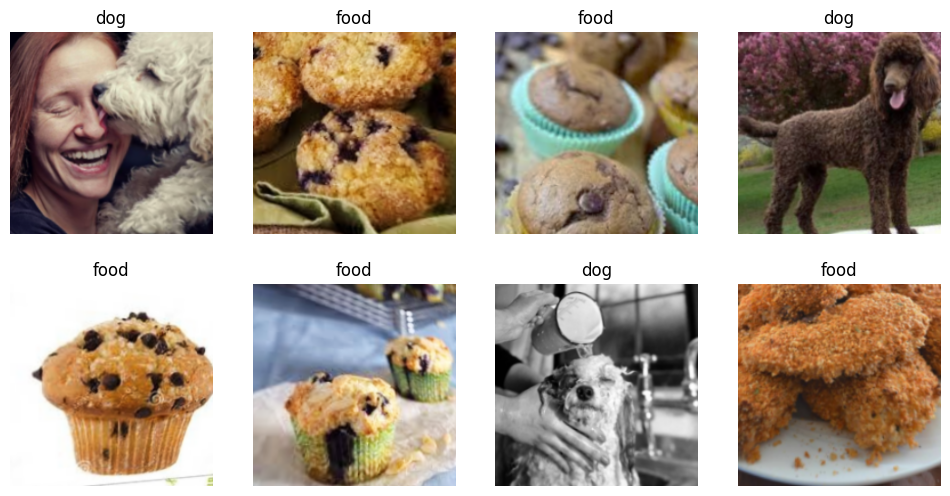

In [5]:
al.show_batch()

In [6]:
al.train_set

,filepath,label
0,data/dog-food/0/00376.jpg,dog
1,data/dog-food/0/00566.jpg,dog
2,data/dog-food/0/00142.jpg,dog
3,data/dog-food/0/00206.jpg,dog
4,data/dog-food/0/00101.jpg,dog
...,...,...
155,data/dog-food/0/00064.jpg,dog
156,data/dog-food/0/00386.jpg,dog
157,data/dog-food/0/00418.jpg,dog
158,data/dog-food/0/00003.jpg,dog


2025-01-13 17:33:18.302 | INFO     | active_vision.core:lr_find:68 - Finding optimal learning rate


2025-01-13 17:33:24.461 | INFO     | active_vision.core:lr_find:70 - Optimal learning rate: 0.0012022644514217973


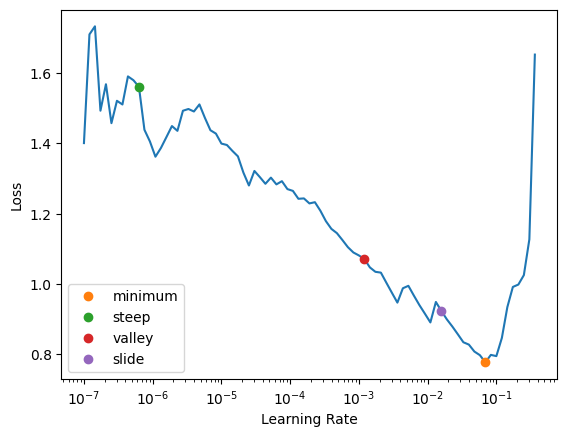

In [7]:
al.lr_find()

2025-01-13 17:33:29.202 | INFO     | active_vision.core:train:73 - Training for 3 epochs with learning rate: 0.001


epoch,train_loss,valid_loss,accuracy,time
0,0.885347,0.197169,0.906250,00:01


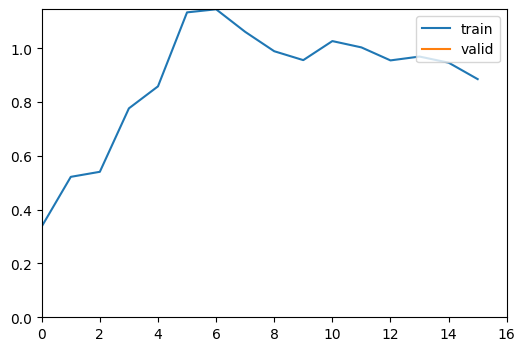

epoch,train_loss,valid_loss,accuracy,time
0,0.444093,0.111664,0.968750,00:01
1,0.352981,0.078557,0.968750,00:01
2,0.330555,0.107216,0.968750,00:01


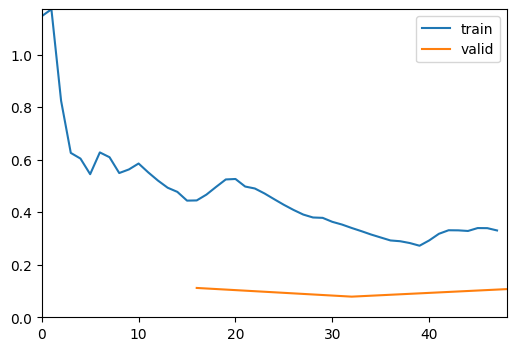

In [8]:
al.train(epochs=3, lr=1e-3)

## Evaluate the model on a *labeled* evaluation set

In [9]:
evaluation_df = pd.read_parquet("data/dog-food/evaluation_samples.parquet")
al.evaluate(evaluation_df, filepath_col="filepath", label_col="label")


2025-01-13 17:33:41.106 | INFO     | active_vision.core:evaluate:115 - Accuracy: 97.67%


0.9766666666666667

## Get the predictions from an *unlabeled* set

In [ ]:
df = pd.read_parquet("data/dog-food/unlabeled_samples.parquet")
filepaths = df["filepath"].tolist()
len(filepaths)

In [ ]:
pred_df = al.predict(filepaths, batch_size=128)
pred_df

In [ ]:
uncertain_df = al.sample_uncertain(pred_df, num_samples=30)
uncertain_df

## Label the uncertain samples

In [ ]:
al.label(uncertain_df, output_filename="uncertain")

In [ ]:
labeled_df = pd.read_parquet("uncertain.parquet")

labeled_df


In [ ]:
al.add_to_train_set(labeled_df, output_filename="active_labeled")